# Visualizing the limiting state property

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The following function generates a transition probability matrix for a random **time-homogeneous, irreducible, and aperiodic** Markov chain with a a single real eigenvalue equal to 1.

In [2]:
def generate_transition_matrix(size):
    P = np.random.random([size,size])
    for row in range(size):
        P[row,:] = P[row,:]/sum(P[row,:])
    return P

We define a number of steps, and a number of starting probability distribution vectors.

In [3]:
n_points = 100
n_steps = 100

Dist is the vector of state-visitation probabilities at time t0.

In [4]:
P = generate_transition_matrix(2)
dist = np.vstack((np.linspace(0,1,n_points),np.linspace(1,0,n_points))).T

$d(t)^T=d(t-1)^T*P$

In [5]:
dist_t = np.zeros([100,3,n_steps])
for i in range(n_steps):
    dist_t[:,0:2,i] = np.matmul(dist,np.linalg.matrix_power(P,i))
    dist_t[:,2,i] = i

In [7]:
dist_t_swap = np.swapaxes(dist_t,1,2)
dist_t_swap = np.swapaxes(dist_t_swap,0,1)

dist_t[i,j,k] contains the different state-visitation probabilities (i,j) at time step k.
We can see that no matter what dist vector at t0 we converge towards a unique stationary distribution.

In [8]:
dist_t = np.reshape(dist_t_swap,(n_steps*n_points,3))

<IPython.core.display.Javascript object>


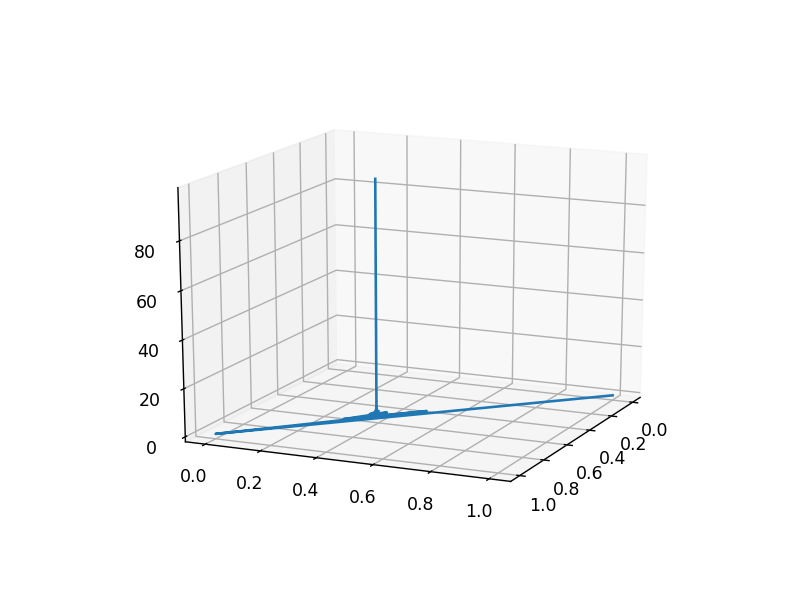

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dist_t[:,0],dist_t[:,1],dist_t[:,2])